# JS Image Eigenvalue Reduction through SVD, U * Sigma * V.T

In [1]:
import numpy as np
from numpy.linalg import multi_dot

%matplotlib inline

from matplotlib.pyplot import *
from pylab import subplots, show
import matplotlib.pyplot as plt

import PIL as pl
from PIL import Image

In [109]:
# Number of Eigenvalues to be Reduced to
n_eig = 15

# Original Image Matrix - I

In [110]:
# Original Image Matrix - I
I = plt.imread('JS2_1024.JPG')

# Red Channel
I = I[:,:,0]

# I_Cond = np.linalg.cond(I)
# print('\n Condition Number of Isolated Channel - Red')
# print(I_Cond)
# Condition Number: 9576222.885843676

UI, DI, VI = np.linalg.svd(I)

# Reconstructed Image Matrix, U * Sigma * V.T
I_k_no_reduce = multi_dot([UI,np.diag(DI),VI])

# Verification that Reconstructed Image Matrix = Original Matrix
# Output Should be True
print('\n I_k = I, (I_k Not Reduced), Output Should be True')
print(np.allclose(I_k_no_reduce, I))

# Reduced I matrix, eigenvalues reduced
I_k = multi_dot([UI[:,:n_eig], np.diag(DI[:n_eig]), VI[:n_eig,:]])

print('\n Reduced UI shape')
print(UI[:,:n_eig].shape)

print('\n Reduced diagonal of DI shape')
print(np.diag(DI[:n_eig]).shape)

print('\n Reduced VI shape')
print(VI[:n_eig,:].shape)

# Verification that Eigenvalue Reduced Reconstructed Image Matrix = Original Matrix
# Output Should be False
print('\n I_k = I, (I_k Reduced), Output Should be False')
print(np.allclose(I_k, I))


 I_k = I, (I_k Not Reduced), Output Should be True
True

 Reduced UI shape
(1024, 15)

 Reduced diagonal of DI shape
(15, 15)

 Reduced VI shape
(15, 1024)

 I_k = I, (I_k Reduced), Output Should be False
False


# Original Matrix I vs Reduced Eigenvalue Reconstruct Matrix I_k

Text(0.5, 1.0, 'I_k, Eigenvalues = 5, Red Channel')

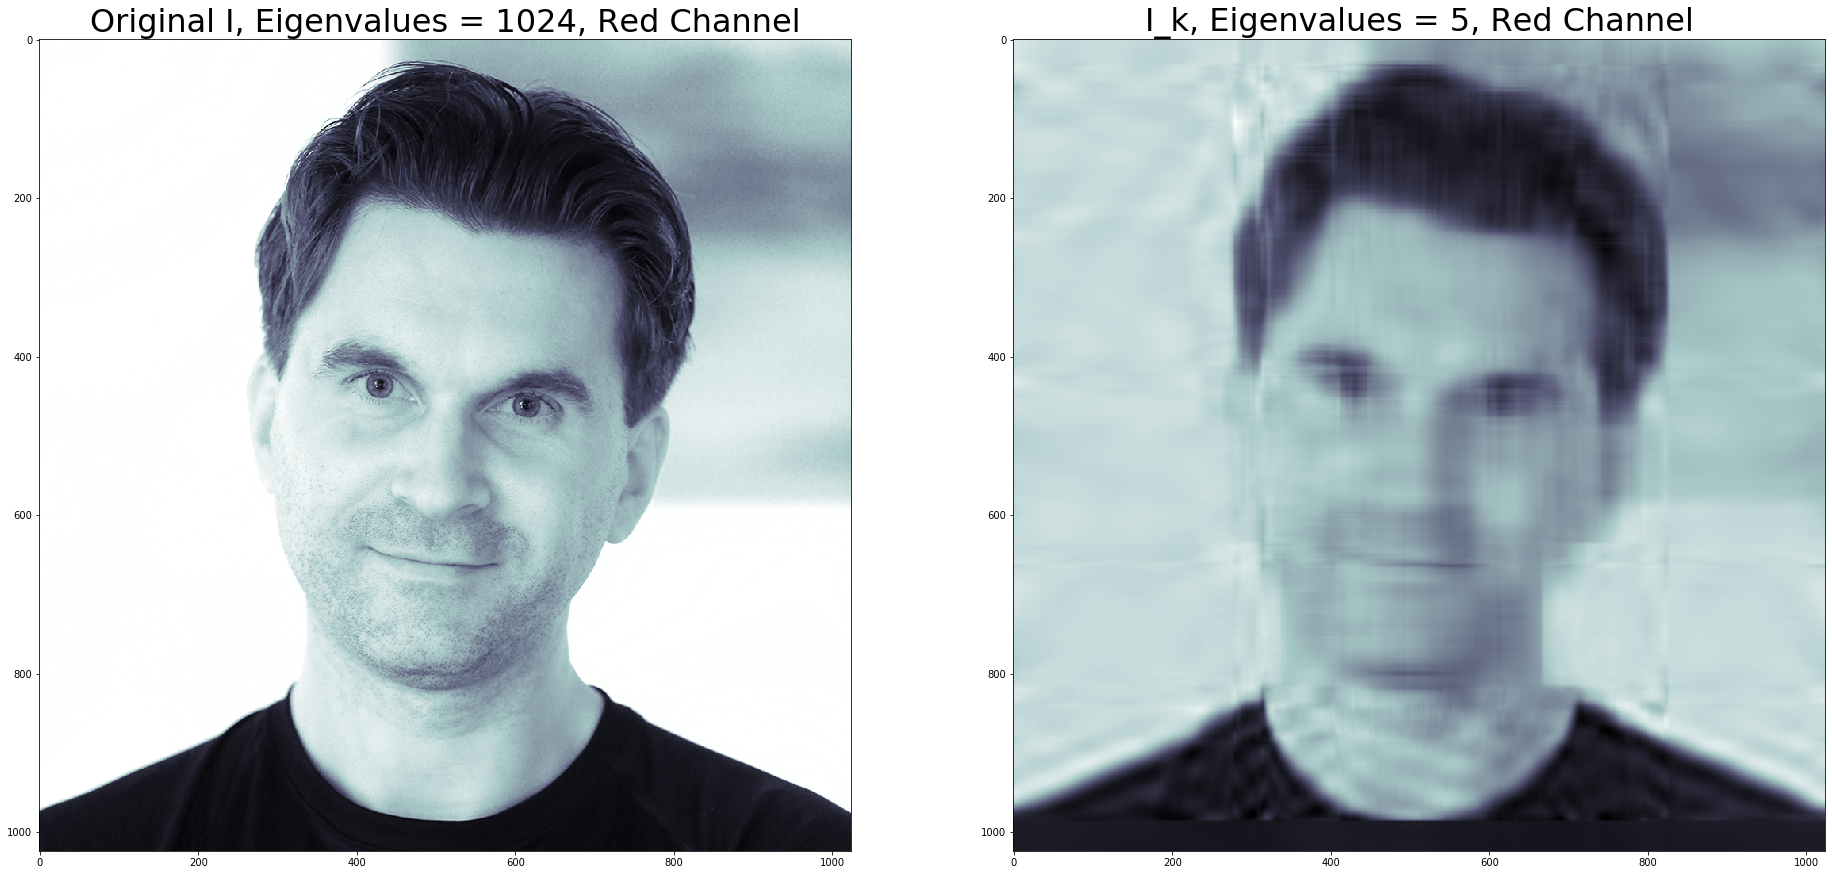

In [111]:
# Original Image Matrix - I
I = plt.imread('JS2_1024.JPG')

# Red Channel
I = I[:,:,0]

cmap = cm.bone

figs = 32 # figsize
fts = 32 # fontsize

fig, axes = subplots(1,2, figsize = (figs,figs))

axes[0].imshow(I, cmap = cmap, interpolation = "nearest")
axes[0].set_title('Original I, Eigenvalues = 1024, Red Channel', fontsize = fts)

axes[1].imshow(I_k, cmap = cmap, interpolation = "nearest")
axes[1].set_title('I_k, Eigenvalues = 5, Red Channel', fontsize = fts)

# Mean Squared Error v.1

In [112]:
# MSE Code - Version 1 - Workaround - Divide by 100
# Avoids outputting: RuntimeWarning: overflow encountered in ubyte_scalars

# Dont use:
# You will receive a different output if running the following code:
# J = plt.imread('JS2_1024.JPG')
# J = J[:,:,0]
# J = J/100

# Division by 100 work around
I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]/100

# Division by 100 work around
I_k = I_k/100

print('\n Size of Original Image Matrix')
print(I.shape)
print('\n Size of Reconstructed Image Matrix - Eigenvalues Reduced')
print(I_k1.shape)

# n1 = number of rows
n1 = np.size(I[:,0])
# n2 = number of columns
n2 = np.size(I[0,:])

N = n1*n2

sum1 = np.zeros(n2)

for j in range(n2):
    sum1[j] = np.sum((I[:,j] - I_k[:,j])**2)

# Multiplication by 10**4 work around since divided by 100 twice i.e. 100**2 = 10**4
MSE = ((np.sum(sum1))/N)*10**4

print('\n MSE = Mean Squared Error')
print(MSE)


 Size of Original Image Matrix
(1024, 1024)

 Size of Reconstructed Image Matrix - Eigenvalues Reduced
(1024, 1024)

 MSE = Mean Squared Error
145.34710891321492


# MSE V.1 - Function

In [46]:
# Division by 100 work around
I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]/100

# Division by 100 work around
I_k1 = I_k/100

def mse_f1(I,I_k):
    # n1 = number of rows
    n1 = np.size(I[:,0])
    # n2 = number of columns
    n2 = np.size(I[0,:])

    N = n1*n2
    sum1 = np.zeros(n2)

    for j in range(n2):
        sum1[j] = np.sum((I[:,j] - I_k[:,j])**2)
    MSE = ((np.sum(sum1))/N)*10**4
    return MSE

# print('\n MSE = Mean Squared Error')
# print(MSE)

mse_f1(I,I_k1)

566.5454813343321

# Mean Squared Error v.2a

In [49]:
# MSE Code - Version 2a - Do Not Use on less powerful computers !!!
# Outputs: RuntimeWarning: overflow encountered in ubyte_scalars

I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]

I_k = I_k

sum1 = 0.0
X = I.shape
M = X[1]
N = X[0]

for j in range(M):
    for i in range(N):
        sum1 = sum1 + (I[i,j] - I_k[i,j])**2

MSE = sum1/(M*N)

print('\n MSE = Mean Squared Error')
print(MSE)


 MSE = Mean Squared Error
566.5454813343723


# MSE V.2a - Function

In [53]:
# mse_f2

I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]

I_k = I_k

def mse_f2(I,I_k):
    sum1 = 0.0
    X = I.shape
    M = X[1]
    N = X[0]

    for j in range(M):
        for i in range(N):
            sum1 = sum1 + (I[i,j] - I_k[i,j])**2
    MSE = sum1/(M*N)
    return MSE

mse_f2(I,I_k)

566.5454813343723

# Mean Squared Error v.2b

In [54]:
# MSE Code - Version 2b - Workaround - Divide by 100
# Avoids outputting: RuntimeWarning: overflow encountered in ubyte_scalars

# Dont use:
# Different output if running the following code:
# J = plt.imread('JS2_1024.JPG')
# J = J[:,:,0]
# J = J/100

# Division by 100 work around
I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]/100

# Division by 100 work around
I_k1 = I_k/100

sum1 = 0.0
X = I.shape
M = X[1]
N = X[0]

for j in range(M):
    for i in range(N):
        sum1 = sum1 + (I[i,j] - I_k1[i,j])**2

# Multiplication by 10**4 work around since divided by 100 twice i.e. 100**2 = 10**4
MSE =  (sum1/(M*N))*10**4

print('\n MSE = Mean Squared Error')
print(MSE)


 MSE = Mean Squared Error
566.5454813343214


# MSE V.2b - Function

In [55]:
# mse_f3

I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]/100

I_k1 = I_k/100

def mse_f3(I,I_k1):
    sum1 = 0.0
    X = I.shape
    M = X[1]
    N = X[0]

    for j in range(M):
        for i in range(N):
            sum1 = sum1 + (I[i,j] - I_k1[i,j])**2
    MSE =  (sum1/(M*N))*10**4
    return MSE

mse_f3(I,I_k1)

566.5454813343214

# Iterations

In [61]:
# mse_f3 - Function First

# I = plt.imread('JS2_1024.JPG')
# I = I[:,:,0]/100

# I_k1 = I_k/100

def mse_f3(I,I_k):
    sum1 = 0.0
    X = I.shape
    M = X[1]
    N = X[0]

    for j in range(M):
        for i in range(N):
            sum1 = sum1 + (I[i,j] - I_k[i,j])**2
    MSE =  (sum1/(M*N))
    return MSE

# mse_f3(I,I_k)

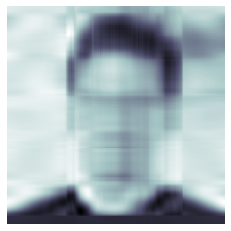


 eigenvalues = 5


566.5454813343723

In [66]:
# Before MSE Array

I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]

n_eig = 5

UI, DI, VI = np.linalg.svd(I)

cmap = cm.bone

for i in range(2,n_eig+1):
    I_k = multi_dot([UI[:,:i], np.diag(DI[:i]), VI[:i,:]])

imshow(I_k, cmap = cmap, interpolation = "nearest")
axis("off")
show()
print('\n eigenvalues =',i)

#     print('\n eigenvalues =',i)
#     imshow(I_k, cmap = cmap, interpolation = "nearest")
#     axis("off")
#     show()

mse_f3(I,I_k)

In [72]:
# With MSE Array - Before Incorporating it into Loop

I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]

n_eig = 5

UI, DI, VI = np.linalg.svd(I)

cmap = cm.bone

for i in range(2,n_eig+1):
    I_k = multi_dot([UI[:,:i], np.diag(DI[:i]), VI[:i,:]])

# imshow(I_k, cmap = cmap, interpolation = "nearest")
# axis("off")
# show()
print('\n eigenvalues =',i)

#     print('\n eigenvalues =',i)
#     imshow(I_k, cmap = cmap, interpolation = "nearest")
#     axis("off")
#     show()

# n1 = number of rows
mse_m = np.size(I[:,0])
# n2 = number of columns
mse_n = np.size(I[0,:])

# mse_array = np.zeros(mse_m)
mse_array = np.zeros(n_eig)
# print(mse_array)
# print(mse_array.shape)

mse_f3(I,I_k)


 eigenvalues = 5
[0. 0. 0. 0. 0.]
(5,)


566.5454813343723

In [115]:
# With MSE Array - Incorporating it into Loop

I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]

n_eig = 15

UI, DI, VI = np.linalg.svd(I)

cmap = cm.bone

mse_array = np.zeros(n_eig-1)

for i in range(2,n_eig+1):
    I_k = multi_dot([UI[:,:i], np.diag(DI[:i]), VI[:i,:]])

    print('\n eigenvalues =',i)
    mse_array[i-2] = mse_f3(I,I_k)
    print(mse_array[i-2])
print(mse_array)


 eigenvalues = 2
1520.1891778778993

 eigenvalues = 3
922.2277990971318

 eigenvalues = 4
732.4987805697094

 eigenvalues = 5
566.5454813343723

 eigenvalues = 6
450.7598810385304

 eigenvalues = 7
371.33902570512663

 eigenvalues = 8
318.44988982163915

 eigenvalues = 9
278.8677293577318

 eigenvalues = 10
243.02433004316705

 eigenvalues = 11
213.07685508447776

 eigenvalues = 12
187.9679656759304

 eigenvalues = 13
171.820870832951

 eigenvalues = 14
157.48842533127691

 eigenvalues = 15
145.34710891322078
[1520.18917788  922.2277991   732.49878057  566.54548133  450.75988104
  371.33902571  318.44988982  278.86772936  243.02433004  213.07685508
  187.96796568  171.82087083  157.48842533  145.34710891]


[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
(14,)
	
[1520.18917788  922.2277991   732.49878057  566.54548133  450.75988104
  371.33902571  318.44988982  278.86772936  243.02433004  213.07685508
  187.96796568  171.82087083  157.48842533  145.34710891]
(14,)


Text(0, 0.5, 'MSE')

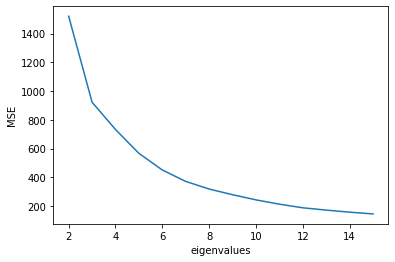

In [154]:
eig_array = np.linspace(2,n_eig,n_eig-1)
print(eig_array)
print(eig_array.shape)

print('\t')

print(mse_array)
print(mse_array.shape)

plt.plot(eig_array,mse_array)
plt.xlabel('eigenvalues')
plt.ylabel('MSE')
# plt.rcParams['font.size'] = 10

# Peak Signal to Noise Ratio

In [173]:
# "n"
en = 8

# print((2**en)-1)

# # numerator
# numer = ((2**en)-1)**2

# PSNR = 10*np.log(numer/MSE)

print('\n MSE = Mean Squared Error')
print(MSE)

PSNR1 = 10*np.log((((2**en)-1)**2)/MSE)

print('\n PSNR = Peak Signal to Noise Ratio')
# print(PSNR)
print(PSNR1)

print('\t')

# PSNR optimally should be in between 20 db to 50 db; 15 db is acceptable; more db the better

if np.greater_equal(PSNR1,20) and np.less_equal(PSNR1,50):
    print("PSNR value is in good range (20 <= PSNR <= 50)")
elif np.greater_equal(PSNR1,15) and np.less_equal(PSNR1,55):
    print("PSNR value is close to good range, close to (20 <= PSNR <= 50)")
else:
    print("PSNR value is not in good range (20 <= PSNR <= 50)")


 MSE = Mean Squared Error
566.5454813343214

 PSNR = Peak Signal to Noise Ratio
47.42969728280055
	
PSNR value is in good range (20 <= PSNR <= 50)


# Normalized Cross Correlation

In [63]:
# Amount of information or how the image is de-correlated

m = np.size(I[:,0])
n = np.size(I[0,:])

print('\n Size of Original Image Matrix I')
print(m,n)

nk_num = np.zeros(n)
nk_denom = np.zeros(n)

# Numerator:
for j in range(n):
    for i in range(m):
        nk_num[j] = (I[i,j]*I_k[i,j]) + nk_num[j]
#         print(nk_num)

sum_nk_num = np.sum(nk_num)
print('\n Sum of Numerator')
print(sum_nk_num)

# Denominator:
for j in range(n):
    for i in range(m):
        nk_denom[j] = (I[i,j])**2 + nk_denom[j]
#         print(nk_denom)

sum_nk_denom = np.sum(nk_denom)

print('\n Sum of Denominator')
print(sum_nk_denom)

NK = sum_nk_num / sum_nk_denom

print('\n Normalized Cross Correlation')
print(NK)
print('\t')

if np.greater_equal(NK,-1) and np.less_equal(NK,1):
    print("NK value is in proper range (-1 <= NK <= 1)")
else:
    print("NK value is out of range (-1 <= NK <= 1)")


 Size of Original Image Matrix I
1024 1024

 Sum of Numerator
42022902454.364624

 Sum of Denominator
42616968449.0

 Normalized Cross Correlation
0.9860603413087372
	
NK value is in proper range (-1 <= NK <= 1)


# Normalized Absolute Error

In [64]:
m = np.size(I[:,0])
n = np.size(I[0,:])

print('\n Size of Original Image Matrix I')
print(m,n)

nae_num = np.zeros(n)
nae_denom = np.zeros(n)

for j in range(n):
    for i in range(m):
        nae_num[j] = np.absolute(I[i,j] - I_k[i,j]) + nae_num[j]
#         print(nae_num)

sum_nae_num = np.sum(nae_num)
print('\n Sum of Numerator')
print(sum_nae_num)

for j in range(n):
    for i in range(m):
        nae_denom[j] = np.absolute(I[i,j]) + nae_denom[j]
#         print(nae_denom)

sum_nae_denom = np.sum(nae_denom)
print('\n Sum of Denominator')
print(sum_nae_denom)

NAE = sum_nae_num / sum_nae_denom

print('\n Normalized Absolute Error')
print(NAE)


 Size of Original Image Matrix I
1024 1024

 Sum of Numerator
16669312.786084827

 Sum of Denominator
193118639.0

 Normalized Absolute Error
0.08631643673754778


# Iterated Eigenvalue Reduction

In [66]:
# Original Image Matrix - I
I = plt.imread('JS2_1024.JPG')

# Red Channel
I = I[:,:,0]

UI, DI, VI = np.linalg.svd(I)


 Reduced UI shape
(1024, 1023)

 Reduced diagonal of DI shape
(1023, 1023)

 Reduced VI shape
(1023, 1024)

 I_k = I, (I_k Reduced), Output Should be False
False


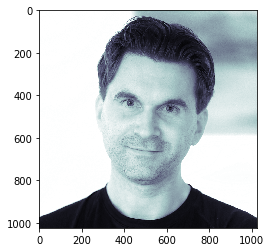


 Reduced UI shape
(1024, 1024)

 Reduced diagonal of DI shape
(1024, 1024)

 Reduced VI shape
(1024, 1024)

 I_k = I, (I_k Reduced), Output Should be False
True


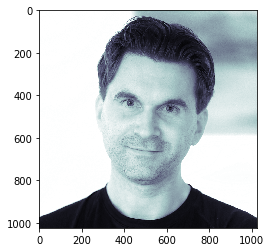

In [77]:
n = 1024

cmap = cm.bone

# start = 1
start = 1023

for i in range(start,n+1):
# for i in range(start,n,5):
    # Reduced I matrix, eigenvalues reduced
    I_k = multi_dot([UI[:,:i], np.diag(DI[:i]), VI[:i,:]])

    print('\n Reduced UI shape')
    print(UI[:,:i].shape)

    print('\n Reduced diagonal of DI shape')
    print(np.diag(DI[:i]).shape)

    print('\n Reduced VI shape')
    print(VI[:i,:].shape)

    # Verification that Eigenvalue Reduced Reconstructed Image Matrix = Original Matrix
    # Output Should be False
    print('\n I_k = I, (I_k Reduced), Output Should be False')
    print(np.allclose(I_k, I))
    
    imshow(I_k, cmap = cmap, interpolation = "nearest")
    show()

# Iterated Eigenvalue Reduction: I - I_k

In [155]:
n = 1024

eps = 10**(-5)

start = 1

for i in range(start,n+1):
# for i in range(start,n+1,5):
    I_k = multi_dot([UI[:,:i], np.diag(DI[:i]), VI[:i,:]])
    
print(I - I_k)
print('\t')
print(np.round(I - I_k))

print('\t')
print(np.allclose(I_k, I))

[[ 7.38964445e-13 -1.53335122e-10 -1.18518528e-10 ... -7.54312168e-11
  -7.19069249e-11 -7.22764071e-11]
 [-2.55795385e-13 -3.55271368e-12 -1.14823706e-11 ... -3.43902684e-12
  -3.01270120e-12 -2.41584530e-12]
 [-2.84217094e-14  3.12638804e-12  4.80326889e-12 ... -2.38742359e-12
  -2.16004992e-12 -2.95585778e-12]
 ...
 [ 7.10542736e-15 -1.20792265e-13 -3.33955086e-13 ... -4.12114787e-13
  -3.97903932e-13 -4.68958206e-13]
 [ 1.06581410e-14 -1.56319402e-13 -2.30926389e-13 ... -4.19220214e-13
  -3.23296945e-13 -3.80140364e-13]
 [-3.55271368e-15 -3.55271368e-13 -1.52766688e-13 ... -6.03961325e-14
  -2.48689958e-14 -3.55271368e-14]]
	
[[ 0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0.  0.  0. ... -0. -0. -0.]
 ...
 [ 0. -0. -0. ... -0. -0. -0.]
 [ 0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]
	
True


# Iterated Eigenvalue Reduction: (I - I_k)^2

In [157]:
n = 1024

eps = 10**(-5)

rows = np.size(I[:,0])
cols = np.size(I[0,:])

eps_matrix = (np.ones([rows,cols]))*eps

# print(eps_matrix)

# start = 1

I_k = multi_dot([UI[:,:n], np.diag(DI[:n]), VI[:n,:]])
# I_k = multi_dot([UI[:,:i], np.diag(DI[:i]), VI[:i,:]])

IK_sq = (I - I_k)**2

# print((I - I_k)**2)

True_Val = np.less(IK_sq, eps_matrix)
# print(True_Val)

# np.any()
# np.any() will output True if at least one element is True

# Outputs True: All values are True
# Outputs False: All values are False
# Outputs True: One value is True, others are False
# Outputs True: One value is False, others are True

print(np.any(True_Val))

# np.all()
# np.all() will output False if at least one element is False

# Outputs True: All values are True
# Outputs False: All values are False
# Outputs False: One value is True, others are False
# Outputs False: One value is False, others are True

print(np.all(True_Val))

# if np.less_equal(IK_sq, eps_matrix):
#     print("True")
# else:
#     print("False")

# print(np.allclose(I,I_k))

True
True


# Iterated Eigenval Reduct: Test (I - I_k)^2 < Epsilon, Epsilon = 10^(-5)

In [161]:
n = 1024

eps = 10**(-5)

rows = np.size(I[:,0])
cols = np.size(I[0,:])

eps_matrix = (np.ones([rows,cols]))*eps

start = 1

for i in range(start,n):
    I_k = multi_dot([UI[:,:i], np.diag(DI[:i]), VI[:i,:]])
    IK_sq = (I - I_k)**2
    True_Val = np.less(IK_sq, eps_matrix)
    if np.all(True_Val) == True:
        print(i)


1021
1022
1023
True
True


# Spatial Frequency Measure (SFM)

In [ ]:
# Spatial Frequency Measures (SFM) is based on the Fourier Transform
# A high SFM implies that the image contains higher frequencies, which is not good
# On the graph, the flat region of the graph contains the low frequencies of the image and
# implies good image quality

In [20]:
# Original Image Matrix - I
I = plt.imread('JS2_1024.JPG')

# Red Channel
I = I[:,:,0]

UI, DI, VI = np.linalg.svd(I)

# Number of Eigenvalues to be Reduced to
n = 5

I_k = multi_dot([UI[:,:n], np.diag(DI[:n]), VI[:n,:]])

Text(0.5, 1.0, 'I_k, Eigenvalues = 5, Red Channel')

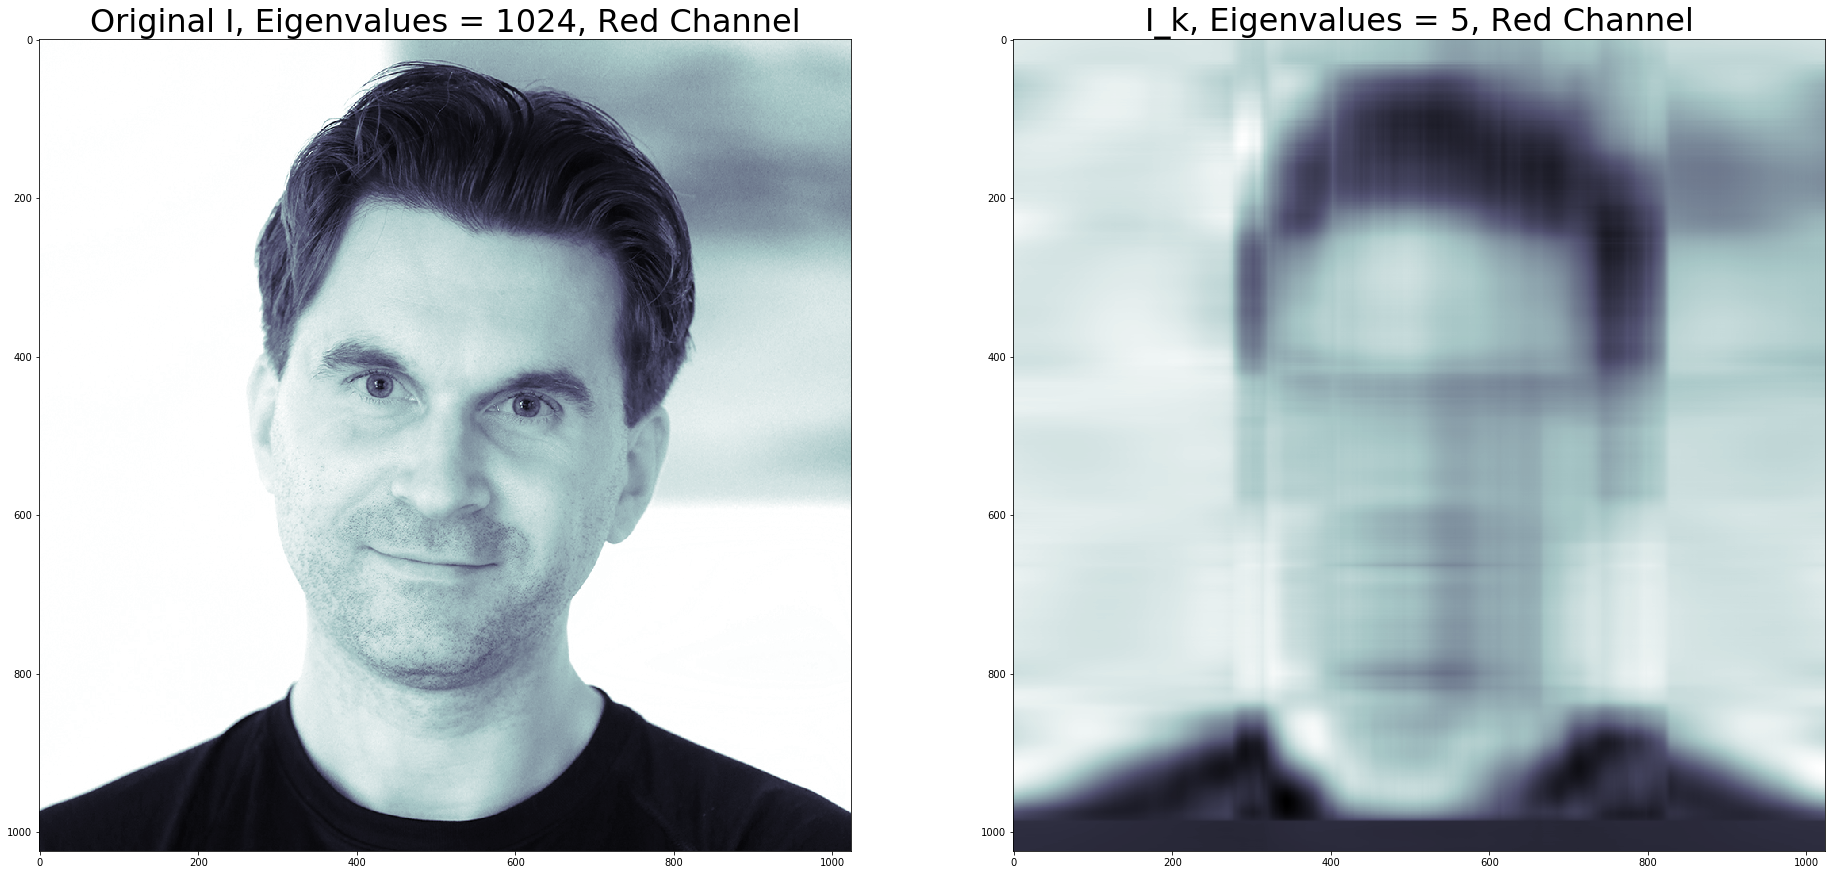

In [21]:
# Original Image Matrix - I
I = plt.imread('JS2_1024.JPG')

# Red Channel
I = I[:,:,0]

cmap = cm.bone

figs = 32 # figsize
fts = 32 # fontsize

fig, axes = subplots(1,2, figsize = (figs,figs))

axes[0].imshow(I, cmap = cmap, interpolation = "nearest")
axes[0].set_title('Original I, Eigenvalues = 1024, Red Channel', fontsize = fts)

axes[1].imshow(I_k, cmap = cmap, interpolation = "nearest")
axes[1].set_title('I_k, Eigenvalues = 5, Red Channel', fontsize = fts)

# SFM: R and C Values

In [24]:
# SFM

I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]

I_k1 = I_k

sum_R = 0.0
sum_C = 0.0

X = I.shape
M = X[1]
N = X[0]

for j in range(N):
    for i in range(2,M):
        sum_R = sum_R + (I[j,i] - I_k1[j,i-1])**2

R_A = sum_R/(M*N)
R = np.sqrt(R_A)

for i in range(M):
    for j in range(2,N):
        sum_C = sum_C + (I[j,i] - I_k1[j-1,i])**2

# for o in range(M):
#     for p in range(2,N):
#         sum_C = sum_C + (I[p,o] - I_k1[p-1,o])**2

C_A = sum_C/(M*N)
C = np.sqrt(C_A)

SFM = np.sqrt(R**2 + C**2)

print('\n R')
print(R)

print('\n C')
print(C)

print('\n SFM')
print(SFM)


 R
23.814171295425684

 C
23.830108204154772

 SFM
33.68959500364469


In [6]:
# Currently Unnecessary - Dont Use

# SFM - Division by 100 - Dont Use - Outputs incorrect value

# Division by 100 work around
I = plt.imread('JS2_1024.JPG')
I = I[:,:,0]/100

# Division by 100 work around
I_k1 = I_k/100

sum2 = 0.0
X = I.shape
M = X[1]
N = X[0]

for j in range(N):
    for i in range(M):
        sum2 = sum2 + (I[j,i] - I_k1[j,i-1])**2

R_A = sum2/(M*N)

# # Multiplication by 10**4 work around since divided by 100 twice i.e. 100**2 = 10**4
# But outputs a larger incorrect value
# R = (np.sqrt(R_A))*10**4


# R = (np.sqrt(R_A))*100

print('\n R')
print(R)


 R
23.814171295425684


# Structural Similarity (SSIM)

In [25]:
m = np.size(I[:,0])
n = np.size(I[0,:])

# print(m)
# print(n)

L = 1024
# L = 255
K_1 = 0.01
K_2 = 0.03

C_1 = (K_1*L)**2
C_2 = (K_2*L)**2
C_3 = (C_2)/2

dof = 0

# Mean of Matrix I
Mu_I = np.mean(I)

# Mean of Matrix I_k
Mu_Ik = np.mean(I_k)

# Variance of Matrix I
# Var_I = np.var(I)
Var_I = np.var(I, ddof = dof)

# Variance of Matrix I_k
# Var_Ik = np.var(I_k,)
Var_Ik = np.var(I_k, ddof = dof)

# Standard Deviation of Matrix I
SD_I = np.std(I, ddof = dof)

# Standard Deviation of Matrix I_k
SD_Ik = np.std(I_k, ddof = dof)

# Covariance of Matrices I and I_k
# Cov_IIk = np.cov(I,I_k)
Cov_IIk = np.cov(I,I_k,ddof = dof)

Cov_IIk2 = np.cov(I_k,I,ddof = dof)

# ???
# Verify Cov(A,B) = Cov(B,A)
print('\n Verification Cov(A,B) = Cov(B,A)')
print(np.allclose(Cov_IIk,Cov_IIk2))

# ???
# Verify Cov(I,I) = Var(I)
Cov_IandI = np.cov(I,I)
print('\n Verification Cov(A,A) = Var(A)')
print(Cov_IandI.shape)
print(np.allclose(Var_I,Cov_IandI))
print(np.allclose(Cov_IandI,Var_I))

print('\n Mean of Matrix I')
print(Mu_I)

print('\n Mean of Matrix I_k')
print(Mu_Ik)

print('\n Verification Mean of Matrix I = Mean of Matrix I_k')
print(np.allclose(Mu_I,Mu_Ik))

print('\n Variance of Matrix I')
print(Var_I)

print('\n Variance of Matrix I_k')
print(Var_Ik)

print('\n Standard Deviation of Matrix I')
print(SD_I)

print('\n Standard Deviation of Matrix I_k')
print(SD_Ik)

# Extra - just for coding verification
print('\n Verify: SD of I = sqrt(var(I)) & SD of I_k = sqrt(var(I_k))')
print(np.allclose(np.sqrt(Var_I),SD_I))
print(np.allclose(np.sqrt(Var_Ik),SD_Ik))

# print('\n Covariance of Matrices I and I_k')
# print(Cov_II_k)
# print(Cov_II_k.shape)
# print(I.shape)
# print(I_k.shape)

# Reshape I, (n)x(n) matrix, into a column vector (nxn)x1
I_Col = np.reshape(I,n*n,1)
print('\t')
print(I_Col.shape)


 Verification Cov(A,B) = Cov(B,A)
False

 Verification Cov(A,A) = Var(A)
(2048, 2048)
False
False

 Mean of Matrix I
184.17228603363037

 Mean of Matrix I_k
184.17122491339606

 Verification Mean of Matrix I = Mean of Matrix I_k
True

 Variance of Matrix I
6723.277310053444

 Variance of Matrix I_k
6157.1226854722745

 Standard Deviation of Matrix I
81.99559323557239

 Standard Deviation of Matrix I_k
78.467335149553

 Verify: SD of I = sqrt(var(I)) & SD of I_k = sqrt(var(I_k))
True
True
	
(1048576,)


In [11]:
# SSIM

SSIM_A = (2*Mu_I*Mu_Ik + C_1)/((Mu_I)**2 + (Mu_Ik)**2 + C_1)

SSIM_B = (2*SD_I*SD_Ik + C_2)/((SD_I)**2 + (SD_Ik)**2 + C_2)

SSIM_C = (Cov_IIk + C_3)/(SD_I*SD_Ik + C_3)

SSIM = SSIM_A*SSIM_B*SSIM_C

print('\n SSIM')
print(SSIM)
print(SSIM.shape)


 SSIM
[[0.1925209  0.19233633 0.19237591 ... 0.07132996 0.0713379  0.07143076]
 [0.19233633 0.19278419 0.19281465 ... 0.07125692 0.07126619 0.07135747]
 [0.19237591 0.19281465 0.19338234 ... 0.0712571  0.07126561 0.07135552]
 ...
 [0.07132996 0.07125692 0.0712571  ... 0.06916112 0.06913624 0.06914252]
 [0.0713379  0.07126619 0.07126561 ... 0.06913624 0.06911238 0.06911848]
 [0.07143076 0.07135747 0.07135552 ... 0.06914252 0.06911848 0.06912554]]
(2048, 2048)


# SVD Energy Calculation

In [ ]:
# Need to Verify ???

In [12]:
U_I, D_I, V_I = np.linalg.svd(I)

U_Ik, D_Ik, V_Ik = np.linalg.svd(I_k)

In [17]:
# E = norm of I_k / norm of I

# Hilbert Schmidt-Norm: Trace(A*A) where A* = adjoint of A
# adjoint of A = A.conj().T
# 

Adj_Ik = I_k.conj().T
# print(Adj_Ik)

Adj_I = I.conj().T
# print(Adj_I)

HSN_Ik_Trace = np.trace(Adj_Ik*I_k)

HSN_I_Trace = np.trace(Adj_I*I)

E1 = HSN_Ik_Trace / HSN_I_Trace

HSN_Ik = 0.0

X1 = I_k.shape
k = X1[1]
# print(k)

for i in range(k):
        HSN_Ik = HSN_Ik + (D_Ik[i])**2

HSN_I = 0.0

X2 = I.shape
n = X2[1]
# print(n)

for j in range(n):
        HSN_I = HSN_I + (D_I[j])**2

# print(HSN_Ik)
# print(HSN_I)
# print('\t')

E2 = HSN_Ik / HSN_I

X3 = I.shape
k = X3[1]
# print(k)

HSN_Num = np.sum(D_Ik[:k]**2)

HSN_Denom = np.sum(D_I**2)

# print(HSN_Num)
# print(HSN_Denom)
# print('\t')

E3 = HSN_Num / HSN_Denom

print('\n SVD Energy Calculation - Trace Method')
print(E1)

print('\n SVD Energy Calculation - Summation - Loop Method')
print(E2)

print('\n SVD Energy Calculation - Summation - Np Sum Method')
print(E3)


 SVD Energy Calculation - Trace Method
749.3574379189547

 SVD Energy Calculation - Summation - Loop Method
0.9860603413087339

 SVD Energy Calculation - Summation - Np Sum Method
0.9860603413087335
